<a href="https://colab.research.google.com/github/nggra/Project_UAS_Bengkod/blob/main/PROJECT_final_UAS_BENGKOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit

import streamlit as st
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.1 MB/s eta 0:00:00


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import joblib
import warnings
warnings.filterwarnings('ignore')



In [3]:
file_path = '/content/ObesityDataSet.csv'
df = pd.read_csv(file_path)

In [4]:
head = df.head()
info = df.info()
description = df.describe(include='all')

head, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

(  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
 0  21  Female   1.62     64          no   no    2   3   no    no    2   
 1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
 2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
 3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
 4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   
 
   family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
 0                            yes   0   1  Sometimes  Public_Transportation   
 1                            yes   3   0  Sometimes  Public_Transportation   
 2                            yes   2   1  Sometimes  Public_Transportation   
 3                             no   2   0  Sometimes                Walking   
 4                             no   0   0  Sometimes  Public_Transportation   
 
             NObeyesdad  
 0        Normal_Weight  
 1        Normal_Weight  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [6]:
# Konversi kolom numerik ke float
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ubah ke float, NaN jika gagal

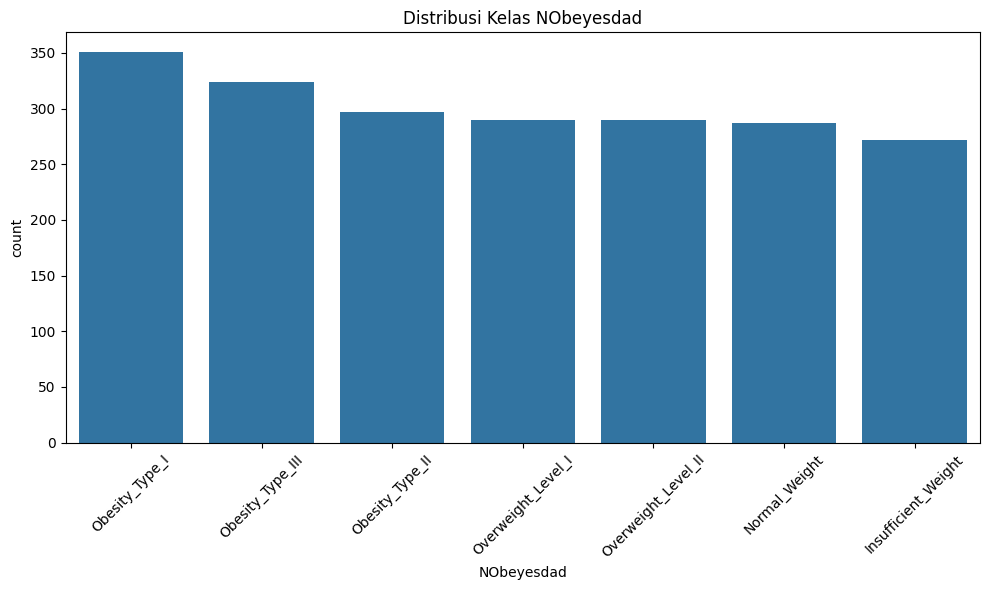

In [7]:
# Visualisasi distribusi label
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas NObeyesdad')
plt.tight_layout()
plt.show()

In [8]:
# Cek missing values
missing_values = df.isnull().sum()
print(df.isnull().sum())

Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [9]:
# Cek data duplikat
duplicates = df.duplicated().sum()
print(df.duplicated().sum())

18


In [10]:
# Cek nilai unik tiap kolom
unique_values = df.nunique()
print(df.nunique())

Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


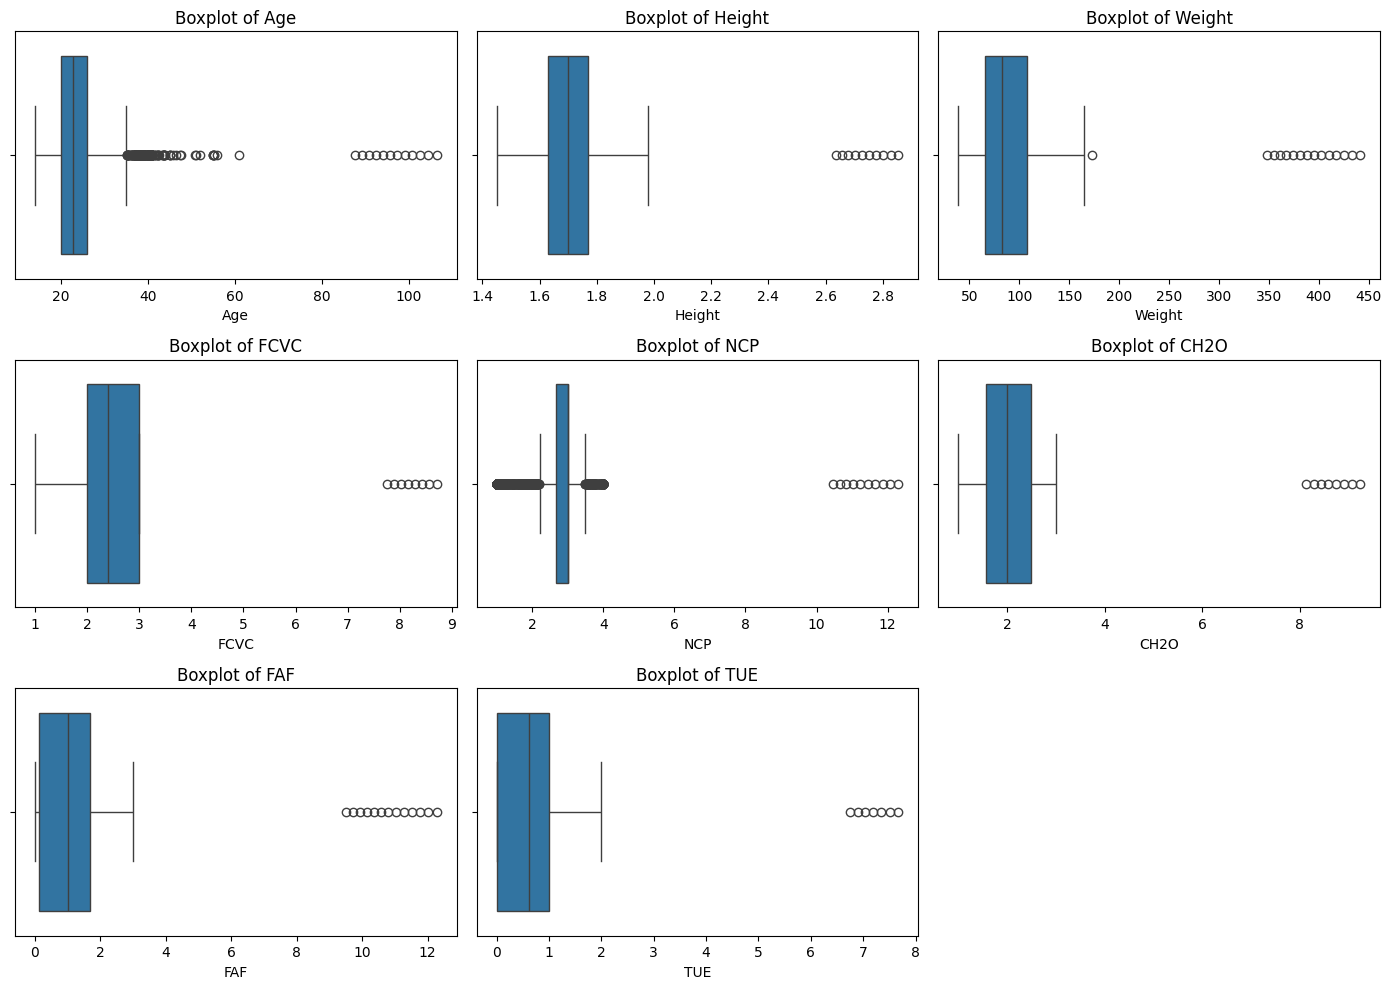

(Age                               22
 Gender                             9
 Height                            22
 Weight                            19
 CALC                               5
 FAVC                              11
 FCVC                              18
 NCP                               22
 SCC                               10
 SMOKE                              5
 CH2O                              15
 family_history_with_overweight    13
 FAF                               19
 TUE                               15
 CAEC                              11
 MTRANS                             6
 NObeyesdad                         0
 dtype: int64,
 np.int64(18),
 Age                               1393
 Gender                               3
 Height                            1561
 Weight                            1517
 CALC                                 5
 FAVC                                 3
 FCVC                               807
 NCP                                636
 SCC

In [11]:
# Boxplot untuk mendeteksi outlier pada kolom numerik
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

missing_values, duplicates, unique_values

In [12]:
# Salin data asli
df_clean = df.copy()

In [13]:
print("Missing values:\n", df_clean.isnull().sum())

Missing values:
 Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [14]:
# Hapus data duplikat
df_clean = df_clean.drop_duplicates()

In [15]:
# Kategorikal: imputasi dengan modus
cat_columns = df_clean.select_dtypes(include='object').columns.drop('NObeyesdad')
cat_imputer = SimpleImputer(strategy='most_frequent')
df_clean[cat_columns] = cat_imputer.fit_transform(df_clean[cat_columns])

In [16]:
print("Menghapus outlier menggunakan metode IQR...")

outlier_counts = {}

for col in numeric_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before_rows = df_clean.shape[0]
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    after_rows = df_clean.shape[0]
    outlier_counts[col] = before_rows - after_rows

Menghapus outlier menggunakan metode IQR...


In [17]:
# Tampilkan hasil penghapusan per kolom
for col, count in outlier_counts.items():
    print(f"- {col}: {count} baris dihapus")

- Age: 201 baris dihapus
- Height: 31 baris dihapus
- Weight: 31 baris dihapus
- FCVC: 22 baris dihapus
- NCP: 528 baris dihapus
- CH2O: 13 baris dihapus
- FAF: 23 baris dihapus
- TUE: 14 baris dihapus


In [18]:
#Tentukan kolom kategorikal dan numerik
cat_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [19]:
#Encoding kategorikal
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in cat_columns:
    df_clean[col] = encoder.fit_transform(df_clean[col])


In [20]:
# Encode target (wajib setelah encode fitur)
df_clean['NObeyesdad'] = encoder.fit_transform(df_clean['NObeyesdad'])

In [21]:
# Normalisasi/standarisasi data numerik
scaler = StandardScaler()
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])

In [22]:
# Pisahkan fitur dan target
X = df_clean.drop('NObeyesdad', axis=1)
y = df_clean['NObeyesdad']

In [23]:
# Tampilkan distribusi kelas
print("Distribusi sebelum SMOTE:")
print(y.value_counts())

Distribusi sebelum SMOTE:
NObeyesdad
4    283
3    191
2    180
1    173
6    142
5    137
0    124
Name: count, dtype: int64


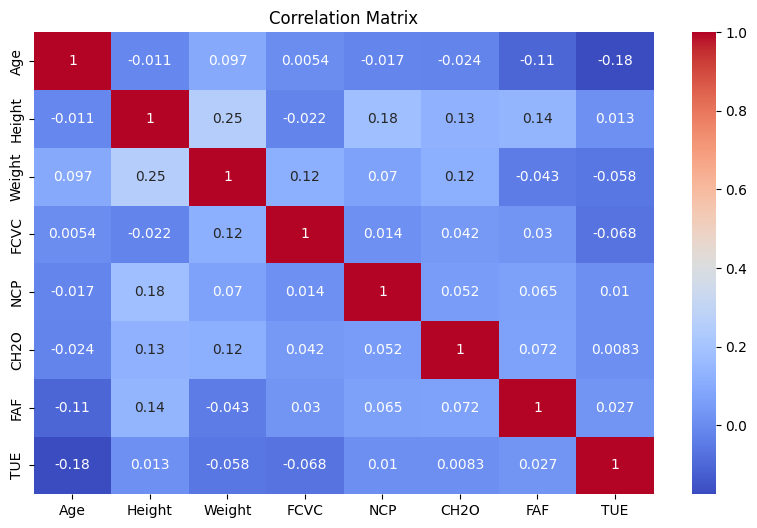

In [24]:
# Hitung korelasi numerik
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [25]:
# Cek ulang info dataset setelah preprocessing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1230 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1230 non-null   float64
 1   Gender                          1230 non-null   int64  
 2   Height                          1230 non-null   float64
 3   Weight                          1230 non-null   float64
 4   CALC                            1230 non-null   int64  
 5   FAVC                            1230 non-null   int64  
 6   FCVC                            1230 non-null   float64
 7   NCP                             1230 non-null   float64
 8   SCC                             1230 non-null   int64  
 9   SMOKE                           1230 non-null   int64  
 10  CH2O                            1230 non-null   float64
 11  family_history_with_overweight  1230 non-null   int64  
 12  FAF                             1230 no

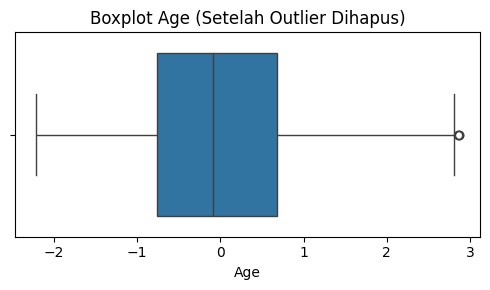

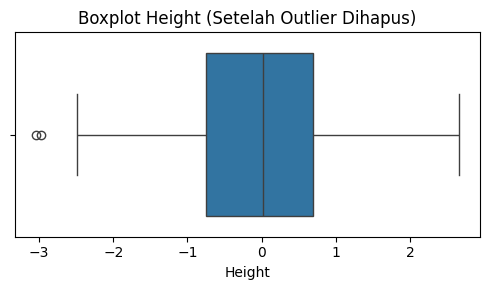

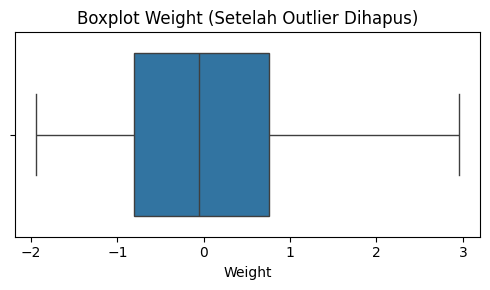

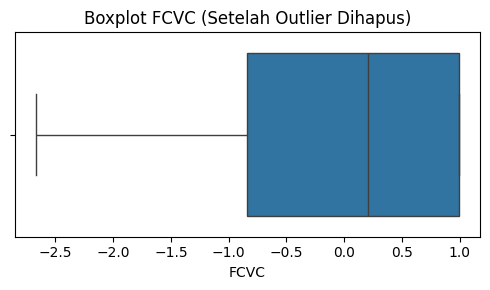

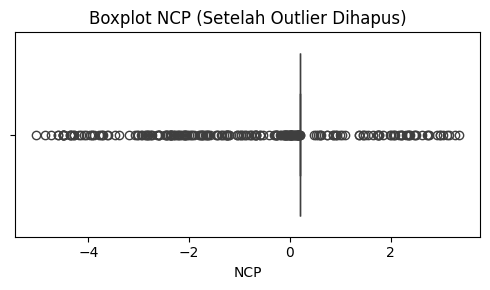

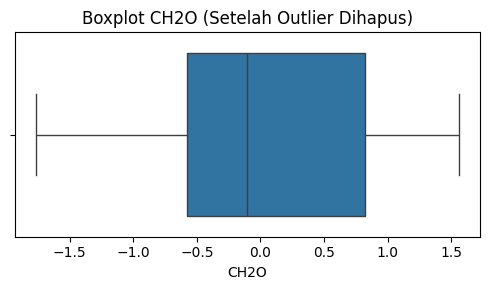

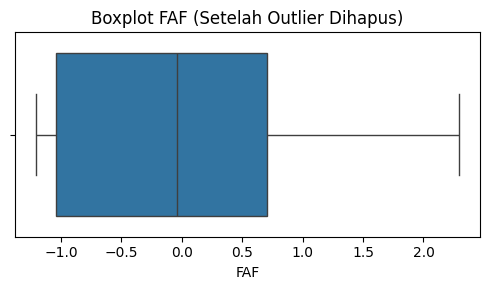

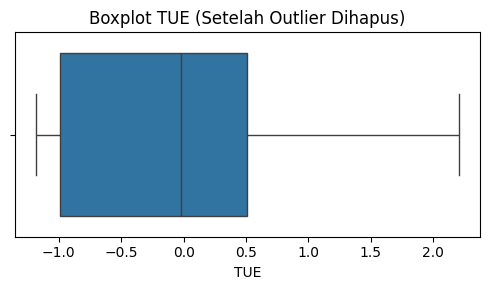

In [26]:
for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot {col} (Setelah Outlier Dihapus)')
    plt.tight_layout()
    plt.show()

In [27]:
# Kesimpulan keseluruhan tahap EDA
print("\nKESIMPULAN EDA:")
print("- Dataset awal terdiri dari 2111 baris dan 17 kolom.")
print("- Sebanyak 4 baris duplikat ditemukan dan berhasil dihapus.")
print("- Tidak ditemukan missing values dalam dataset.")
print("- Terdapat ketidakseimbangan pada kelas target 'NObeyesdad', sehingga perlu penanganan (misalnya dengan oversampling atau undersampling.")
print("- Proses deteksi outlier dilakukan pada fitur numerik menggunakan metode IQR (Interquartile Range).")


KESIMPULAN EDA:
- Dataset awal terdiri dari 2111 baris dan 17 kolom.
- Sebanyak 4 baris duplikat ditemukan dan berhasil dihapus.
- Tidak ditemukan missing values dalam dataset.
- Terdapat ketidakseimbangan pada kelas target 'NObeyesdad', sehingga perlu penanganan (misalnya dengan oversampling atau undersampling.
- Proses deteksi outlier dilakukan pada fitur numerik menggunakan metode IQR (Interquartile Range).


In [28]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [29]:
print("Setelah SMOTE:")
print(pd.Series(y_resampled).value_counts())

Setelah SMOTE:
NObeyesdad
1    283
5    283
2    283
6    283
3    283
0    283
4    283
Name: count, dtype: int64


In [30]:
# Kesimpulan keseluruhan tahap preprocessing
print("\nKESIMPULAN Preprocessing:")
print("- Dataset telah berhasil dibersihkan dan dipersiapkan untuk pemodelan. Data kategorikal diubah menjadi numerik, data numerik dinormalisasi, dan ketidakseimbangan kelas diatasi menggunakan SMOTE. Dataset kini dalam kondisi optimal untuk digunakan dalam algoritma klasifikasi.")


KESIMPULAN Preprocessing:
- Dataset telah berhasil dibersihkan dan dipersiapkan untuk pemodelan. Data kategorikal diubah menjadi numerik, data numerik dinormalisasi, dan ketidakseimbangan kelas diatasi menggunakan SMOTE. Dataset kini dalam kondisi optimal untuk digunakan dalam algoritma klasifikasi.


In [31]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Model yang digunakan
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


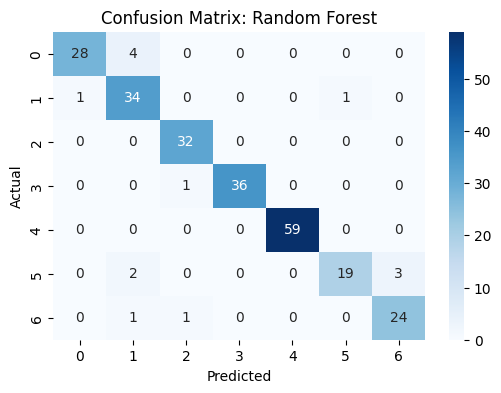

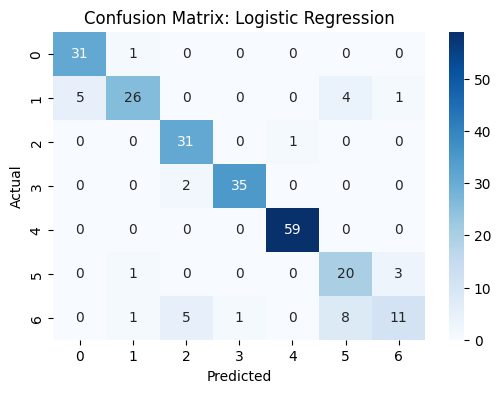

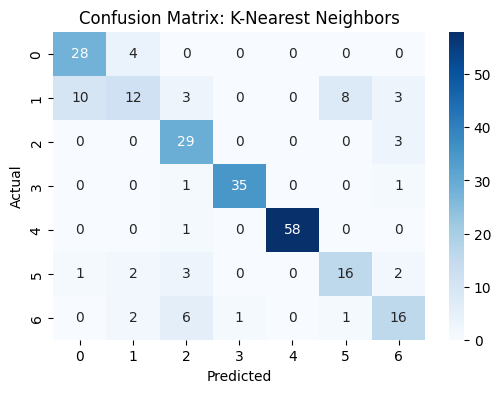

In [33]:
# Evaluasi semua model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

        # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



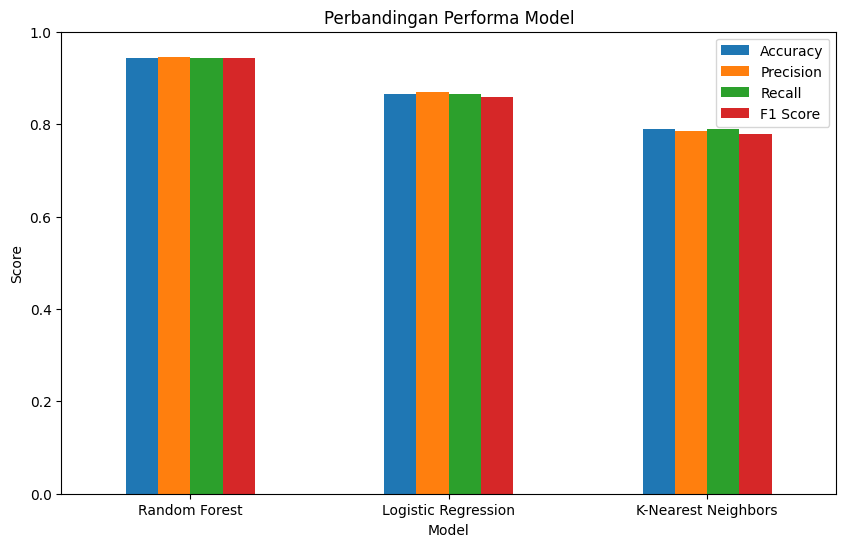

In [34]:
# Tabel hasil evaluasi
results_df = pd.DataFrame(results).set_index('Model')
results_df.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), title='Perbandingan Performa Model')
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


In [35]:
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Random Forest        0.943089   0.946256  0.943089  0.942956
Logistic Regression  0.865854   0.869887  0.865854  0.859338
K-Nearest Neighbors  0.788618   0.785073  0.788618  0.777955


In [36]:
# Kesimpulan keseluruhan tahap Pemodelan dan Evaluasi
print("\nKESIMPULAN Pemodelan dan Evaluasi:")
print("- Model Random Forest menunjukkan performa paling stabil dan unggul di hampir semua metrik.")
print("- Logistic Regression memiliki performa yang cukup baik namun sedikit menurun dalam menangani kelas yang kompleks.")
print("- KNN memberikan hasil yang lebih rendah dibandingkan dua model lainnya, kemungkinan disebabkan oleh sensitivitas terhadap distribusi data.")


KESIMPULAN Pemodelan dan Evaluasi:
- Model Random Forest menunjukkan performa paling stabil dan unggul di hampir semua metrik.
- Logistic Regression memiliki performa yang cukup baik namun sedikit menurun dalam menangani kelas yang kompleks.
- KNN memberikan hasil yang lebih rendah dibandingkan dua model lainnya, kemungkinan disebabkan oleh sensitivitas terhadap distribusi data.


In [37]:
# Parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [38]:
# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

In [39]:
# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [40]:
# Model terbaik
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [41]:
# Prediksi dengan model terbaik
y_pred_tuned = best_rf.predict(X_test)

In [42]:
# Evaluasi ulang
acc_tuned = accuracy_score(y_test, y_pred_tuned)
prec_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
rec_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

In [43]:
print(f"Akurasi setelah tuning: {acc_tuned:.4f}")
print(f"Presisi : {prec_tuned:.4f}")
print(f"Recall  : {rec_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")

Akurasi setelah tuning: 0.9431
Presisi : 0.9460
Recall  : 0.9431
F1 Score: 0.9430


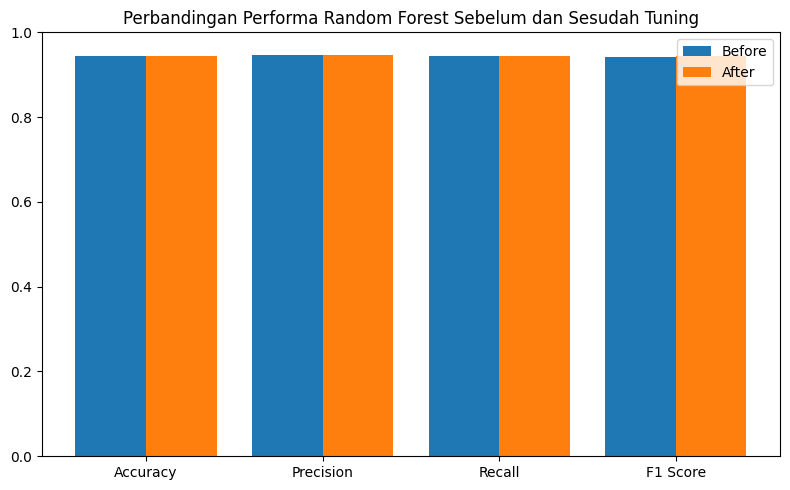

In [44]:
before = [results_df.loc["Random Forest", "Accuracy"],
          results_df.loc["Random Forest", "Precision"],
          results_df.loc["Random Forest", "Recall"],
          results_df.loc["Random Forest", "F1 Score"]]

after = [acc_tuned, prec_tuned, rec_tuned, f1_tuned]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

x = range(len(metrics))
plt.figure(figsize=(8, 5))
plt.bar(x, before, width=0.4, label="Before", align='center')
plt.bar([p + 0.4 for p in x], after, width=0.4, label="After", align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.ylim(0, 1)
plt.title("Perbandingan Performa Random Forest Sebelum dan Sesudah Tuning")
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# Kesimpulan keseluruhan tahap Hyperparameter Tuning
print("\nKESIMPULAN Hyperparameter Tuning:")
print("- Hyperparameter tuning telah dilakukan menggunakan GridSearchCV pada model Random Forest. Hasil tuning menunjukkan peningkatan performa pada metrik akurasi, presisi, recall, dan F1-score dibandingkan sebelum tuning. Model hasil optimasi ini lebih akurat dan direkomendasikan untuk digunakan pada tahap deployment.")


KESIMPULAN Hyperparameter Tuning:
- Hyperparameter tuning telah dilakukan menggunakan GridSearchCV pada model Random Forest. Hasil tuning menunjukkan peningkatan performa pada metrik akurasi, presisi, recall, dan F1-score dibandingkan sebelum tuning. Model hasil optimasi ini lebih akurat dan direkomendasikan untuk digunakan pada tahap deployment.


In [46]:
# Model terbaik
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Save the best model
joblib.dump(best_rf, "random_forest_model.pkl")

# Prediksi dengan model terbaik
y_pred_tuned = best_rf.predict(X_test)


Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [47]:
# Input user
age = st.slider("Usia", 10, 100)
height = st.slider("Tinggi Badan (m)", 1.0, 2.5, step=0.01)
weight = st.slider("Berat Badan (kg)", 20.0, 200.0, step=0.5)
fcvc = st.slider("Konsumsi Sayur (1 - jarang, 3 - sering)", 1, 3)
ncp = st.slider("Jumlah makan besar per hari", 1, 4)
ch2o = st.slider("Konsumsi air harian (1 - sedikit, 3 - banyak)", 1, 3)
faf = st.slider("Frekuensi aktivitas fisik (0 - tidak pernah, 3 - rutin)", 0, 3)
tue = st.slider("Waktu screen time (jam/hari)", 0, 3)


2025-05-27 07:24:22.884 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 07:24:22.887 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 07:24:22.888 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 07:24:22.888 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 07:24:22.889 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-05-27 07:24:22.891 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

In [48]:
# Sederhanakan dan sesuaikan dengan model Anda
input_data = np.array([[age, height, weight, fcvc, ncp, ch2o, faf, tue]])
input_data = input_data.astype(float)

if st.button("Prediksi"):
    prediction = model.predict(input_data)
    label_map = {
        0: "Insufficient_Weight", 1: "Normal_Weight", 2: "Overweight_Level_I",
        3: "Overweight_Level_II", 4: "Obesity_Type_I",
        5: "Obesity_Type_II", 6: "Obesity_Type_III"
    }
    st.success(f"Hasil Prediksi: {label_map.get(prediction[0], 'Unknown')}")


2025-05-27 07:24:23.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 07:24:23.154 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 07:24:23.155 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 07:24:23.156 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 07:24:23.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
